In [1]:
# Importing frequently used libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For machine learning and neural networks
import pickle  # For serializing and de-serializing Python object structures
from tensorflow import keras  # For neural networks
from tensorflow.keras.models import Sequential, Model, load_model  # For sequential and functional API models
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, InputLayer  # For different types of layers in a neural network
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer
from tensorflow.keras.metrics import categorical_crossentropy, MeanSquaredError  # For different types of loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
from tensorflow.keras.datasets import cifar100  # CIFAR-100 dataset
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.model_selection import KFold  # For K-Fold cross validation
import itertools  # For creating iterators for efficient looping
import os  # For interacting with the OS
import shutil  # For high-level file operations
import torch  # PyTorch library for machine learning
import random  # For generating random numbers
import glob  # For finding all the pathnames matching a specified pattern
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import warnings  # For warning control
import tensorflow.keras.applications.efficientnet as efn  # For EfficientNet model
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings
%matplotlib inline  # For inline backend


UsageError: unrecognized arguments: # For inline backend


In [2]:
# Change the current working directory to the specified path where the dataset is located
os.chdir(r'C:\Users\RezaHardMan\Documents\Python projects\datasets\age and gender detection')

# Load the dataset into a pandas DataFrame
data = pd.read_csv("age_gender.csv")

In [3]:
# Display the first 20 rows of the DataFrame
data.head(20)
#pixels are not float type

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [4]:
# Get a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [5]:
# Convert the 'pixels' column into a numpy array and change the data type to float32
data['pixels'] = data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

# Convert the 'pixels' column of the dataframe into a list and then convert it into a numpy array
inputs = np.array(data['pixels'].tolist())

# Reshape the inputs to match the image size. In this case, each image is 48x48 pixels with 1 channel (grayscale)
inputs = inputs.reshape(inputs.shape[0], 48, 48, 1)

# Set 'gender' column as the target variable
targets = data['gender']

# Split the dataset into training and testing sets. 80% of the data will be used for training and 20% for testing.
# The random_state parameter ensures that the splits generate are reproducible.
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=18)


In [6]:
# Convert the target variables (y_train and y_test) into a binary matrix representation using to_categorical function
# This is necessary for training the neural network for multi-class classification.
# Here, '2' indicates that there are 2 classes for the classification task (male and female).
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


In [7]:
# Initialize an ImageDataGenerator object with specific data augmentation parameters
datagen = ImageDataGenerator(
    # rotation_range=10: Degree range for random rotations. Images will be rotated by a random angle within this range.
    rotation_range=10,  
    # zoom_range=0.1: Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
    zoom_range = 0.1,
    # width_shift_range=0.1: Range for random horizontal shifts. If a float, fraction of total width.
    width_shift_range=0.1,  
    # height_shift_range=0.1: Range for random vertical shifts. If a float, fraction of total height.
    height_shift_range=0.1,
    # validation_split=0.1: Fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.1
)

In [8]:
# Define the architecture of the model
model = Sequential([
    # Add the first convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation function, 'same' padding and an input shape of 48x48 with 1 channel
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(48,48,1)),
    # Add the second convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation function, and 'same' padding
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    # Normalize the activations of the previous layer at each batch
    BatchNormalization(),
    # Downscale the input along its spatial dimensions (height and width) by taking the maximum value over an input window (2x2) for each channel of the previous layer's output and stride of 2
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),    
    # Apply dropout to the input to prevent overfitting
    Dropout(0.1),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    # Flatten the tensor output from the last convolutional operations before feeding it to the dense layers
    Flatten(),
    # Add a dense layer with 1024 units and a 'relu' activation function
    Dense(1024, activation = 'relu'),
    # Apply dropout to the input to prevent overfitting
    Dropout(0.5),

    # Add the final layer with 2 output units (as we have 2 classes) with a 'softmax' activation function
    Dense(units=2, activation='softmax')
])

# Print a string summary of the network
print(model.summary())

# Configure the learning process of the model by compiling it
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Import necessary callbacks from Keras
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau

# Define the path to save the weights of the model after each epoch if there is an improvement in 'val_accuracy'
filepath1="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath2 = "best_weights.hdf5"

# Define ModelCheckpoint callbacks to save the weights
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# List of callbacks to apply during training
callbacks_list = [checkpoint1,checkpoint2]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        3

In [9]:
# Calculate the number of steps per epoch for training and validation
# The number of steps per epoch is the total number of samples divided by the batch size.
# np.ceil is used to round up to the nearest whole number to ensure that all samples are included
TRAIN_STEPS_PER_EPOCH = np.ceil(len(X_train)*0.9/32)
VAL_STEPS_PER_EPOCH = np.ceil(len(X_train)*0.1/8)

# Fit the model to the data
# datagen.flow is used to generate batches of augmented data
# The 'subset' parameter specifies whether the data generator is for training or validation
# The 'steps_per_epoch' parameter specifies how many batches of samples to use in one epoch
# The 'validation_steps' parameter specifies how many batches of validation samples to use in one epoch
# The 'epochs' parameter specifies how many times to iterate over the entire dataset
# The 'verbose' parameter controls the verbosity of the output messages. 2 means one line per epoch.
# The 'shuffle' parameter specifies whether to shuffle the training data before each epoch
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32, subset='training'),
    validation_data=datagen.flow(X_train, y_train, batch_size=8, subset='validation'),
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    validation_steps=VAL_STEPS_PER_EPOCH,
    epochs=30,
    verbose=2,
    shuffle=True
)


Epoch 1/30
534/534 - 16s - loss: 0.5755 - accuracy: 0.6924 - val_loss: 0.4726 - val_accuracy: 0.7732 - 16s/epoch - 31ms/step
Epoch 2/30
534/534 - 8s - loss: 0.4170 - accuracy: 0.8063 - 8s/epoch - 15ms/step
Epoch 3/30
534/534 - 11s - loss: 0.3595 - accuracy: 0.8364 - 11s/epoch - 20ms/step
Epoch 4/30
534/534 - 15s - loss: 0.3352 - accuracy: 0.8531 - 15s/epoch - 29ms/step
Epoch 5/30
534/534 - 24s - loss: 0.3157 - accuracy: 0.8607 - 24s/epoch - 46ms/step
Epoch 6/30
534/534 - 26s - loss: 0.2981 - accuracy: 0.8677 - 26s/epoch - 50ms/step
Epoch 7/30
534/534 - 26s - loss: 0.2873 - accuracy: 0.8739 - 26s/epoch - 50ms/step
Epoch 8/30
534/534 - 27s - loss: 0.2757 - accuracy: 0.8813 - 27s/epoch - 50ms/step
Epoch 9/30
534/534 - 27s - loss: 0.2693 - accuracy: 0.8821 - 27s/epoch - 50ms/step
Epoch 10/30
534/534 - 27s - loss: 0.2635 - accuracy: 0.8849 - 27s/epoch - 50ms/step
Epoch 11/30
534/534 - 27s - loss: 0.2593 - accuracy: 0.8881 - 27s/epoch - 50ms/step
Epoch 12/30
534/534 - 27s - loss: 0.2505 - ac

In [10]:
# Evaluate the model on the test data using `evaluate`
print("\nEvaluating the model on test data...")
results = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')



Evaluating the model on test data...
149/149 [==============================] - 2s 13ms/step - loss: 0.2241 - accuracy: 0.9057
Test Loss: 0.22409586608409882
Test Accuracy: 0.9057161211967468


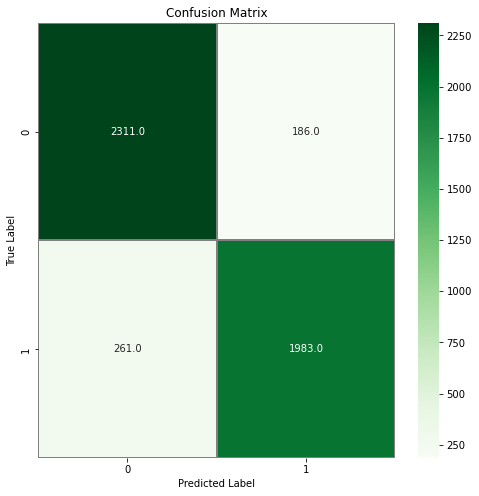

In [13]:
import seaborn as sns

# Predict the values from the test data
y_pred = model.predict(X_test)
# Convert predictions classes from one hot vectors to labels: [1, 0, 0] --> 0, [0, 1, 0] --> 1
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test observations from one hot vectors to labels
y_true = np.argmax(y_test, axis = 1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


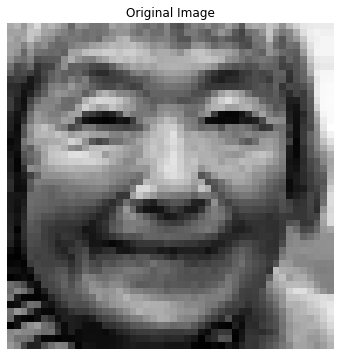

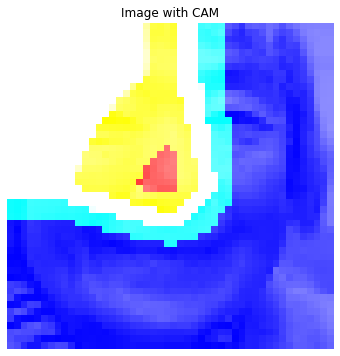

In [22]:
import cv2

# Select the last convolutional layer in your model
last_conv_layer = model.get_layer('conv2d_12')

# Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

# Choose a random image from your test set
img = X_test[0]

# Compute the gradient of the class output value with respect to the feature map
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, np.argmax(predictions[0])]

# Extract the gradients and average them spatially
output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]
weights = tf.reduce_mean(grads, axis=(0, 1))

# Compute the weighted sum of the feature maps
cam = np.dot(output, weights)

# Postprocess the heatmap
cam = cv2.resize(cam, (48, 48), cv2.INTER_LINEAR)
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

# Render the heatmap on the original image
img_gray = img.squeeze()
img_gray = img_gray.astype('float32')
img_gray /= 255.
cam_heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
cam_heatmap = cv2.cvtColor(cam_heatmap, cv2.COLOR_BGR2RGB)
# Convert grayscale image to RGB
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

# Superimpose the heatmap onto original image
superimposed_img = 0.6*img_rgb + 0.4*cam_heatmap


# Display the original image and the superimposed image
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.imshow(superimposed_img)
plt.title('Image with CAM')
plt.axis('off')
plt.show()


In [23]:
# Define the architecture of the model
model2 = Sequential([
    # Add an Input Layer which is the point of entry in the model. It has an input shape of 48x48 with 1 channel
    InputLayer(input_shape=(48,48,1)),
    # Add the first convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation function, and 'same' padding
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    # Add the second convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation function, and 'same' padding
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    # Normalize the activations of the previous layer at each batch
    BatchNormalization(),
    # Downscale the input along its spatial dimensions (height and width) by taking the maximum value over an input window (2x2) for each channel of the previous layer's output
    MaxPool2D(pool_size=(2, 2)),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),    
    # Apply dropout to the input to prevent overfitting
    Dropout(0.1),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # Repeat the same structure for more layers with more filters
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2)),
    # Flatten the tensor output from the last convolutional operations before feeding it to the dense layers
    Flatten(),
    # Add a dense layer with 1024 units and a 'relu' activation function
    Dense(1024, activation = 'relu'),
    # Apply dropout to the input to prevent overfitting
    Dropout(0.5),

    # Add the final layer with 1 output unit with a 'relu' activation function
    Dense(units=1, activation='relu')
])

# Print a string summary of the network
print(model2.summary())

# Configure the learning process of the model by compiling it
# Here we use the Adam optimizer, mean squared error as the loss function (commonly used for regression problems)
# and mean absolute error (mae) as the metric
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)       

In [24]:
# Uncomment the following lines if 'pixels' data needs to be processed
# Convert the 'pixels' column into a numpy array and change the data type to float32
# data['pixels'] = data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

# Convert the 'pixels' column of the dataframe into a list and then convert it into a numpy array
# inputs = np.array(data['pixels'].tolist())

# Reshape the inputs to match the image size. In this case, each image is 48x48 pixels with 1 channel (grayscale)
# inputs = inputs.reshape(inputs.shape[0],48,48,1)

# Set 'age' column as the target variable
targets = data['age']

# Split the dataset into training and testing sets. 80% of the data will be used for training and 20% for testing.
# The random_state parameter ensures that the splits generate are reproducible.
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=18)

# Further split the training data into training and validation sets. 90% of the data will be used for training and 10% for validation.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=18)


In [25]:
# Initialize an ImageDataGenerator object with specific data augmentation parameters
datagen2 = ImageDataGenerator(
    # rotation_range=10: Degree range for random rotations. Images will be rotated by a random angle within this range.
    rotation_range=10,  
    # zoom_range=0.1: Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
    zoom_range = 0.1,
    # width_shift_range=0.1: Range for random horizontal shifts. If a float, fraction of total width.
    width_shift_range=0.1,  
    # height_shift_range=0.1: Range for random vertical shifts. If a float, fraction of total height.
    height_shift_range=0.1,
)

In [26]:
# Calculate the number of steps per epoch for training and validation
# The number of steps is the total number of samples divided by the batch size
# We use np.ceil to round up to the nearest whole number to ensure that all samples are included
TRAIN_STEPS_PER_EPOCH = np.ceil(len(X_train) / 32)
VAL_STEPS_PER_EPOCH = np.ceil(len(X_valid) / 8)

# Fit the model to the data using the generator
# This avoids having to load the entire dataset into memory
history = model2.fit(
    # Generate batches of augmented data for training
    datagen2.flow(X_train, y_train, batch_size=32),
    # Specify the number of steps taken per epoch for training
    steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
    # Repeat the same process for validation data
    validation_data=datagen.flow(X_valid, y_valid, batch_size=8),
    # Specify the number of steps taken per epoch for validation
    validation_steps=VAL_STEPS_PER_EPOCH,
    # Set the number of epochs to train for
    epochs=30,
    # Set verbose mode for logging
    verbose=1,
    # Shuffle the training data at each epoch
    shuffle=True
)


Epoch 1/30
534/534 [==============================] - 10s 17ms/step - loss: 355.2202 - mae: 14.3860 - val_loss: 986.8719 - val_mae: 26.0857
Epoch 2/30
534/534 [==============================] - 8s 16ms/step - loss: 220.0404 - mae: 11.1018 - val_loss: 761.2455 - val_mae: 22.9430
Epoch 3/30
534/534 [==============================] - 9s 17ms/step - loss: 188.6707 - mae: 10.1934 - val_loss: 190.2236 - val_mae: 10.4724
Epoch 4/30
534/534 [==============================] - 10s 19ms/step - loss: 167.1466 - mae: 9.4945 - val_loss: 193.8896 - val_mae: 9.6267
Epoch 5/30
534/534 [==============================] - 12s 23ms/step - loss: 155.0006 - mae: 9.1066 - val_loss: 177.6277 - val_mae: 9.3404
Epoch 6/30
534/534 [==============================] - 13s 24ms/step - loss: 134.8860 - mae: 8.4826 - val_loss: 256.5681 - val_mae: 11.6430
Epoch 7/30
534/534 [==============================] - 17s 32ms/step - loss: 127.0920 - mae: 8.2488 - val_loss: 210.4358 - val_mae: 11.2773
Epoch 8/30
534/534 [========

In [27]:
# Define the architecture of the model
model3 = tf.keras.Sequential([
    # Add an Input Layer which is the point of entry in the model. It has an input shape of 48x48 with 1 channel
    InputLayer(input_shape=(48,48,1)),
    # Add the first convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation function
    Conv2D(32, (3, 3), activation='relu'),
    # Normalize the activations of the previous layer at each batch
    BatchNormalization(),
    # Downscale the input along its spatial dimensions (height and width) by taking the maximum value over an input window (2x2) for each channel of the previous layer's output
    MaxPool2D((2, 2)),
    # Repeat the same structure for more layers with more filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    # Flatten the tensor output from the last convolutional operations before feeding it to the dense layers
    Flatten(),
    # Add a dense layer with 64 units and a 'relu' activation function
    Dense(64, activation='relu'),
    # Apply dropout to the input to prevent overfitting
    Dropout(rate=0.5),
    # Add the final layer with 1 output unit with a 'relu' activation function
    Dense(1, activation='relu')
])

# Define the Stochastic Gradient Descent (SGD) optimizer with a momentum of 0.9
sgd = tf.keras.optimizers.SGD(momentum=0.9)

# Configure the learning process of the model by compiling it
# Here we use the Adam optimizer, mean squared error as the loss function (commonly used for regression problems)
# and mean absolute error (mae) as the metric
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define a custom callback to stop training when validation loss reaches a certain threshold
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # If the validation loss at the end of an epoch is less than 110, stop the training
        if(logs.get('val_loss')<75):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True

# Instantiate the custom callback
callback = myCallback()

# Print a string summary of the network
model3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                      

In [28]:
# Fit the model to the training data
history = model3.fit(
    # Training data
    X_train, 
    # Labels for the training data
    y_train, 
    # Number of epochs to train for
    epochs=30, 
    # Fraction of the training data to be used as validation data
    validation_split=0.1, 
    # Number of samples per gradient update
    batch_size=64
)


Epoch 1/30
240/240 [==============================] - 4s 14ms/step - loss: 286.3558 - mae: 12.7539 - val_loss: 337.8063 - val_mae: 13.7991
Epoch 2/30
240/240 [==============================] - 3s 12ms/step - loss: 191.1929 - mae: 10.3694 - val_loss: 167.1781 - val_mae: 9.0740
Epoch 3/30
240/240 [==============================] - 3s 12ms/step - loss: 153.3997 - mae: 9.2724 - val_loss: 118.0182 - val_mae: 8.0438
Epoch 4/30
240/240 [==============================] - 3s 12ms/step - loss: 140.9194 - mae: 8.8410 - val_loss: 119.0700 - val_mae: 7.8804
Epoch 5/30
240/240 [==============================] - 3s 12ms/step - loss: 135.8900 - mae: 8.6367 - val_loss: 125.3593 - val_mae: 8.3231
Epoch 6/30
240/240 [==============================] - 3s 12ms/step - loss: 123.1100 - mae: 8.1995 - val_loss: 155.4451 - val_mae: 9.6851
Epoch 7/30
240/240 [==============================] - 3s 12ms/step - loss: 119.9094 - mae: 8.0799 - val_loss: 529.4650 - val_mae: 20.5769
Epoch 8/30
240/240 [=================

In [29]:
# Evaluate the model on the test data using `evaluate`
print("\nEvaluating the model on test data...")
results = model2.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')



Evaluating the model on test data...
149/149 [==============================] - 3s 16ms/step - loss: 72.3876 - mae: 5.9070
Test Loss: 72.38755798339844
Test Accuracy: 5.906989097595215


In [36]:
# Evaluate the model on the test data using `evaluate`
print("\nEvaluating the model on test data...")
results = model3.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test Loss: {results[0]}')
print(f'Test Accuracy: {results[1]}')



Evaluating the model on test data...
149/149 [==============================] - 0s 3ms/step - loss: 96.9882 - mae: 7.1416
Test Loss: 96.98822784423828
Test Accuracy: 7.1415815353393555


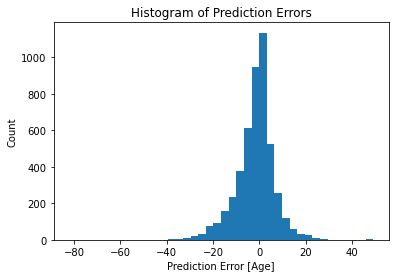

In [34]:
# Predict the ages on the test set
y_pred = model2.predict(X_test)

# Flatten y_pred to a 1D array
y_pred = y_pred.flatten()

# Calculate the prediction errors
errors = y_pred - y_test

# Create a histogram of the errors
plt.hist(errors, bins=40)
plt.xlabel('Prediction Error [Age]')
plt.ylabel('Count')
plt.title('Histogram of Prediction Errors')
plt.show()


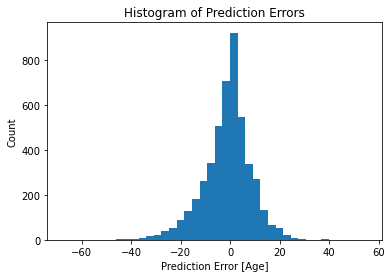

In [35]:
# Predict the ages on the test set
y_pred = model3.predict(X_test)

# Flatten y_pred to a 1D array
y_pred = y_pred.flatten()

# Calculate the prediction errors
errors = y_pred - y_test

# Create a histogram of the errors
plt.hist(errors, bins=40)
plt.xlabel('Prediction Error [Age]')
plt.ylabel('Count')
plt.title('Histogram of Prediction Errors')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


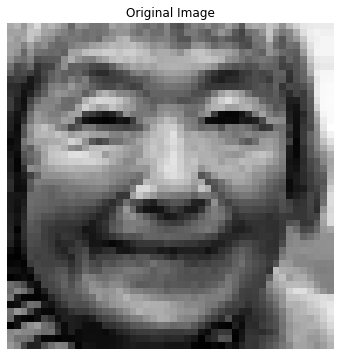

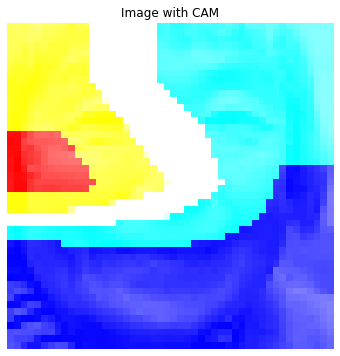

In [40]:
# Select the last convolutional layer in your model
last_conv_layer = model2.get_layer('conv2d_38')

# Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
grad_model = Model([model2.inputs], [last_conv_layer.output, model2.output])

# Choose a random image from your test set
img = X_test[0]

# Compute the gradient of the class output value with respect to the feature map
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, 0]

# Extract the gradients and average them spatially
output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]
weights = tf.reduce_mean(grads, axis=(0, 1))

# Compute the weighted sum of the feature maps
cam = np.dot(output, weights)

# Postprocess the heatmap
cam = cv2.resize(cam, (48, 48), cv2.INTER_LINEAR)
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

# Render the heatmap on the original image
img_gray = img.squeeze()
img_gray = img_gray.astype('float32')
img_gray /= 255.
cam_heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
cam_heatmap = cv2.cvtColor(cam_heatmap, cv2.COLOR_BGR2RGB)
# Convert grayscale image to RGB
img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

# Superimpose the heatmap onto original image
superimposed_img = 0.6*img_rgb + 0.4*cam_heatmap

# Display the original image and the superimposed image
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(6,6))
plt.imshow(superimposed_img)
plt.title('Image with CAM')
plt.axis('off')
plt.show()
